# What is the most optimal skill to learn for Data Analysts?

#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter on Data Analyst and United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode the job skills
df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [3]:
# analyzing the dataframe (df_DA_US_exploded)
df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [4]:
# sort the dataframe by count of skills:
df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [5]:
# set the above dataframe to a new dataframe (df_DA_skills) and rename the columns to be more specific
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

#rename the columns to be more specific
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [6]:
# We need the count of job postings
# this would be a count of our original dataframe (df_DA_US)
# set this number to DA_job_count

DA_job_count = len(df_DA_US)

DA_job_count

4350

In [7]:
# Going back to our latest dataframe df_DA_skills, we need to create a new column 'skill_percent'
# This is the skill count / job count

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [8]:
# We need to reduce our new dataframe above df_DA_skills to make it plotable

# set a threshold variable
skill_percent = 5

# use our threhold above (skill_percent = 5) to filter the dataframe again to only skills above 5%
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand



,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


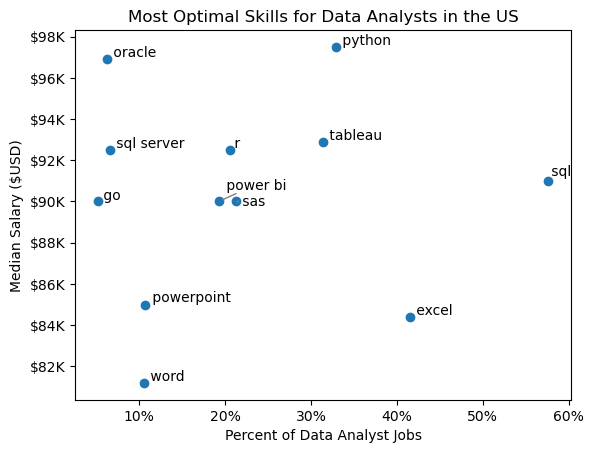

In [12]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')


from matplotlib.ticker import PercentFormatter

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [ ]:
# create a new dictionary that has a key: value pair of technology: deduped skills list 

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

In [15]:
# with the dictionary above, we will make it a new dataframe

df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology

,technology,skills
0,analyst_tools,"[esquisse, microstrategy, alteryx, tableau, sa..."
1,programming,"[shell, php, delphi, rust, python, mongo, c++,..."
2,cloud,"[watson, gcp, openstack, firebase, colocation,..."
3,libraries,"[hadoop, nltk, pytorch, ionic, opencv, ggplot2..."
4,other,"[github, npm, yarn, gitlab, flow, homebrew, ch..."
5,databases,"[postgresql, db2, sqlite, mariadb, sql server,..."
6,os,"[ubuntu, suse, macos, windows, unix, fedora, a..."
7,async,"[notion, asana, clickup, wimi, dingtalk, trell..."
8,webframeworks,"[rubyon rails, fastapi, ember.js, ruby on rail..."
9,sync,"[slack, rocketchat, wire, ringcentral, symphon..."


In [16]:
# now we want to explode out the skills above and set it to the dataframe (df_technology)

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,esquisse
0,analyst_tools,microstrategy
0,analyst_tools,alteryx
0,analyst_tools,tableau
0,analyst_tools,sap
...,...,...
9,sync,microsoft teams
9,sync,mattermost
9,sync,zoom
9,sync,twilio


In [17]:
# now we need to merge the above dataframe (df_technology) with the original dataframe (df_skills_high_demand)

df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


In [ ]:
# Set the merged dataframe (df_DA_skills_high_demand) to a new dataframe (df_plot)

df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

df_plot

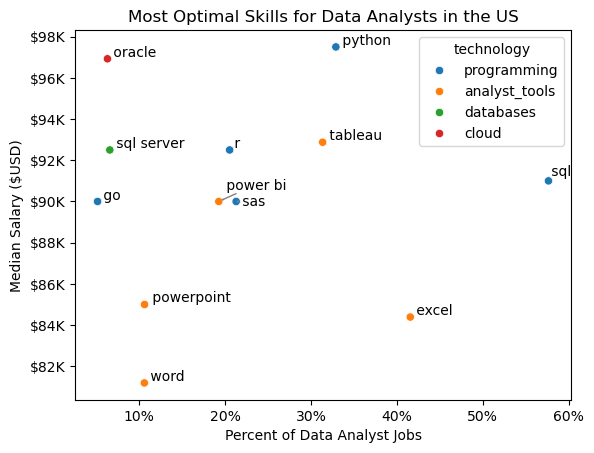

In [21]:
# read to plot the above

from adjustText import adjust_text


#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')

# We are going to use seaborn
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'

)


#plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')


from matplotlib.ticker import PercentFormatter

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()